In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [3]:
def mape(y_true, y_pred):
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape

In [4]:
df = pd.read_csv('CERdata_clean.csv')
train = df.loc[:,['holidays', 'Hour', 'Month', 'Temperature', 'humiduity', 'Wind_speed']]
target = df["Power"]
print(train.head)
print(target.head)
x_train,x_test,y_train,y_test = train_test_split(train,target,test_size=0.1,random_state=42)

mm = MinMaxScaler()
ss = StandardScaler()
X_train = mm.fit_transform(x_train)
X_test = mm.transform(x_test)
print(X_train[:5])

<bound method NDFrame.head of        holidays  Hour  Month  Temperature  humiduity  Wind_speed
0             0   0.0      7        11.80       93.0        14.4
1             0   0.5      7        11.80       91.0        14.4
2             0   1.0      7        11.80       89.0        18.0
3             0   1.5      7        11.60       91.0        18.0
4             0   2.0      7        11.40       93.0        10.8
...         ...   ...    ...          ...        ...         ...
25723         1  21.5     12         5.55       87.5         7.2
25724         1  22.0     12         5.60       86.0        10.8
25725         1  22.5     12         5.60       85.0        10.8
25726         1  23.0     12         5.60       84.0        10.8
25727         1  23.5     12         5.60       84.0        10.8

[25728 rows x 6 columns]>
<bound method NDFrame.head of 0        322.546
1        279.998
2        245.900
3        219.626
4        204.403
          ...   
25723    624.430
25724    584.6

<AxesSubplot:>

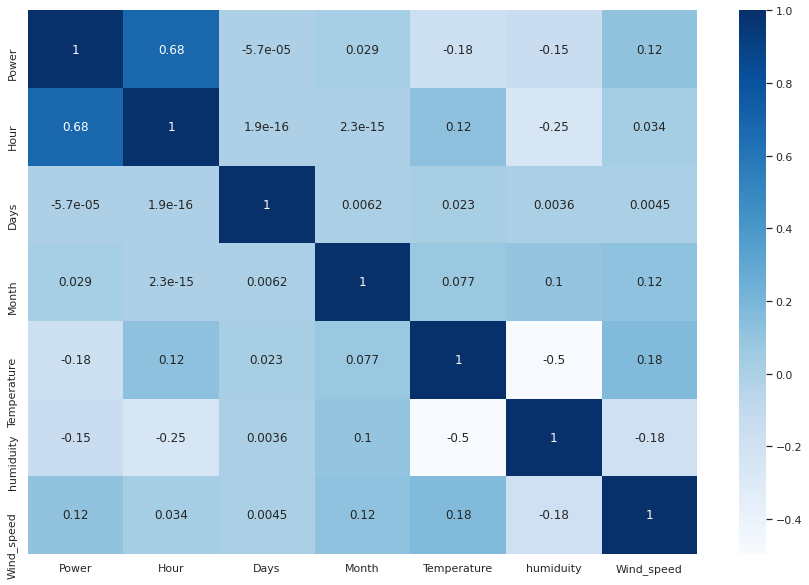

In [9]:
df = df.loc[:,['Power', 'Hour', 'Month', 'Temperature', 'humiduity', 'Wind_speed']]
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='Blues',annot=True)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


param_distribs = {
    'n_estimators':np.arange(500, 1000).tolist(),
    'max_depth':np.arange(2, 50).tolist(),
    'max_features':np.arange(1, 8).tolist(),
    
}

RS_RFR = RandomizedSearchCV(RandomForestRegressor(), param_distribs, refit=True, cv=5, verbose=1, n_jobs=5)
RS_RFR.fit(X_train, y_train)
print(RS_RFR.best_params_, 'score:', RS_RFR.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.95300951 0.95131805 0.9495706  0.95310742 0.89922801        nan
 0.95308425 0.91082242 0.85403822 0.87731061]
  category=UserWarning


{'n_estimators': 786, 'max_features': 4, 'max_depth': 32} score: 0.9531074155538743


In [ ]:
from sklearn.model_selection import GridSearchCV

In [28]:
'''
{'n_estimators': 214, 'max_features': 3, 'max_depth': 17} score: 0.953423921428762
{'n_estimators': 403, 'max_features': 3, 'max_depth': 27} score: 0.9543744764133061
{'n_estimators': 876, 'max_features': 3, 'max_depth': 46} score: 0.9544692575813734
{'n_estimators': 776, 'max_features': 3, 'max_depth': 48} score: 0.9545356145876225
{'n_estimators': 959, 'max_features': 3, 'max_depth': 48} score: 0.954475671460116
{'n_estimators': 617} score: 0.9545350797719155
'''
from matplotlib import pyplot

RFR = RandomForestRegressor(n_estimators=617, max_features=3, max_depth=48)
history = RFR.fit(X_train, y_train)
RFR_y_pred = RFR.predict(X_test)
print(metrics.mean_absolute_error(y_test, RFR_y_pred))
print(metrics.mean_absolute_percentage_error(y_test,RFR_y_pred))



25.742931434798887
0.056684112675186686


最大得分：0.9495530170729254 子树数量为：991


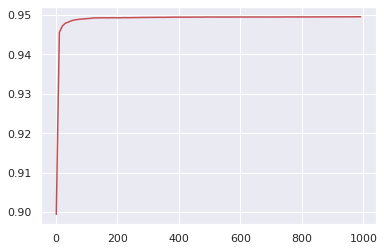

In [38]:
from sklearn.model_selection import cross_val_score
score_lt = []
for i in range(0,1000,10):
    rfc = RandomForestRegressor(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, X_train, y_train, cv=5).mean()
    score_lt.append(score)
score_max = max(score_lt)
print('最大得分：{}'.format(score_max),
      '子树数量为：{}'.format(score_lt.index(score_max)*10+1))

# 绘制学习曲线
x = np.arange(1,1001,10)
plt.subplot(111)
plt.plot(x, score_lt, 'r-')
plt.show()